<a href="https://colab.research.google.com/github/riyajaiswal25/MLProjects/blob/main/SalaryEstimationusingK_nearestNeighbour.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Importing Libraries***

In [5]:
import pandas as pd #useful for loading the dataset
import numpy as np #to perform array

***Choosing Dataset from Local Directory***

In [2]:
from google.colab import files
uploaded = files.upload()

Saving sal.csv to sal.csv


***Loading Dataset***

In [6]:
dataset = pd.read_csv('sal.csv')

In [7]:
dataset

,age,education.num,capital.gain,hours.per.week,income
0,90,8,0,40,<=50K
1,82,5,0,18,<=50K
2,66,6,0,40,>50K
3,54,9,0,40,<=50K
4,41,3,0,40,<=50K
...,...,...,...,...,...
94,32,6,0,40,<=50K
95,43,6,0,43,<=50K
96,32,12,0,40,<=50K
97,54,6,0,65,<=50K


***Mapping Salary Data to Binary Value***

In [8]:
income_set = set(dataset['income'])
dataset['income'] = dataset['income'].map({'<=50K':0, '>50K':1})
print(dataset.head(20))

    age  education.num  capital.gain  hours.per.week  income
0    90              8             0              40       0
1    82              5             0              18       0
2    66              6             0              40       1
3    54              9             0              40       0
4    41              3             0              40       0
5    34              2             0              45       1
6    38              8             0              20       0
7    74              1             0              40       0
8    68              9             0              60       0
9    41             12             0              40       1
10   45             15             0              35       0
11   38              1             0              45       0
12   52              3             0              20       0
13   32              5             0              40       0
14   51              5             0              55       0
15   46              9  

***Segregate dataset into X(input/independent variable) and Y(output/dependent variable)***

In [9]:
X = dataset.iloc[:, :-1].values
X

array([[90,  8,  0, 40],
       [82,  5,  0, 18],
       [66,  6,  0, 40],
       [54,  9,  0, 40],
       [41,  3,  0, 40],
       [34,  2,  0, 45],
       [38,  8,  0, 20],
       [74,  1,  0, 40],
       [68,  9,  0, 60],
       [41, 12,  0, 40],
       [45, 15,  0, 35],
       [38,  1,  0, 45],
       [52,  3,  0, 20],
       [32,  5,  0, 40],
       [51,  5,  0, 55],
       [46,  9,  0, 40],
       [45,  9,  0, 76],
       [57,  2,  0, 40],
       [22,  5,  0, 50],
       [23, 11,  0, 40],
       [25,  6,  0, 34],
       [32, 15,  0, 40],
       [26, 13,  0, 40],
       [28, 13,  0, 54],
       [32,  6,  0, 21],
       [32,  6,  0, 40],
       [38, 15,  0, 44],
       [26,  6,  0, 40],
       [23, 15,  0, 23],
       [32,  6,  0, 40],
       [32,  6,  0, 40],
       [26, 14,  0, 87],
       [32,  6,  0, 40],
       [32, 15,  0, 40],
       [27,  6,  0, 43],
       [32, 15,  0, 40],
       [29,  6,  0, 40],
       [32,  6,  0, 26],
       [32, 15,  0, 40],
       [32,  6,  0, 40],


In [10]:
Y = dataset.iloc[:, -1].values
Y

array([0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0])

***Splitting Dataset into Train and Test***

In [11]:
!pip install scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [12]:
#Scikit Learn
from sklearn.model_selection import train_test_split #sklearn - split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)


***Feature Scaling***

In [13]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_train

array([[-0.39726507,  0.68988101,  0.        , -0.05075766],
       [ 0.07184581, -0.14191035,  0.        , -1.92879113],
       [-0.7881908 ,  0.27398533,  0.        , -0.05075766],
       [-0.86637594,  0.58590709,  0.        , -0.05075766],
       [-0.39726507, -0.34985819,  0.        , -0.05075766],
       [-0.39726507,  0.48193317,  0.        , -0.05075766],
       [ 0.46277154, -0.86972779,  0.        , -1.55318444],
       [-0.39726507, -0.34985819,  0.        ,  0.41875071],
       [-0.6318205 , -0.34985819,  0.        , -0.05075766],
       [ 1.32280815,  0.79385493,  0.        , -0.05075766],
       [-0.86637594, -0.34985819,  0.        , -0.05075766],
       [-1.17911653, -0.45383211,  0.        ,  0.88825907],
       [-1.25730167, -0.34985819,  0.        , -0.05075766],
       [ 1.47917844, -0.34985819,  0.        ,  1.26386577],
       [-0.7881908 , -0.34985819,  0.        , -0.05075766],
       [ 3.51199223, -0.45383211,  0.        , -2.11659448],
       [ 0.46277154, -0.

***Finding the Best K-Value***

Text(0, 0.5, 'Mean Error')

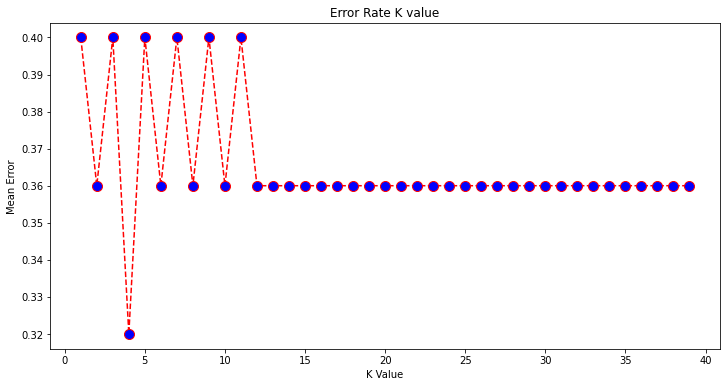

In [21]:
error = []
from sklearn.neighbors import KNeighborsClassifier #Algorithm
import matplotlib.pyplot as plt #Data Visulaization

#Calculating error for K values between 1 and 40
for i in range(1, 40):
  model = KNeighborsClassifier(n_neighbors=i)
  model.fit(X_train, y_train)
  pred_i = model.predict(X_test)
  error.append(np.mean(pred_i != y_test))
  
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10)
plt.title('Error Rate K value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')


***Training***

In [22]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors= 30, metric = 'minkowski', p=2)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=30)

***Predicting Test Data***

In [24]:
y_pred = model.predict(X_test)

***Evaluating Model - CONFUSION MATRIX***

In [25]:
from sklearn.metrics import confusion_matrix, accuracy_score
print("Accuracy of the Model: {0}%".format(accuracy_score(y_test,y_pred)*100))

Accuracy of the Model: 64.0%


***Predicting new data***

In [26]:
age = (int)(input("Enter New Employee's age: "))
edu = (int)(input("Enter New Employee's Education: "))
cg = int(input("ENter new employee's Capital Gain: "))
wh = int(input("Enter new Employee's Hour's per week"))
newEmp = [[age,edu,cg,wh]]
result = model.predict(sc.transform(newEmp))
print(result)

if result == 1:
  print("Employee might got salary above 50K")
else:
  print("Customer might not got salary above 50K")

Enter New Employee's age: 32
Enter New Employee's Education: 12
ENter new employee's Capital Gain: 0
Enter new Employee's Hour's per week32
[0]
Customer might not got salary above 50K
